this notebook gives the plots for z500 for the corresponding days that cyclones were present within the bounds of the data. 

z500 shows general large scale weather patterns, and also tells us the temperature of a column of air underneath any point on the contour. Warm air raises the z500 height, and so as you rise through the column, the pressure decreases. Cold air compresses the z500 height, and the pressure increases throughout the column.

Closed contours are a feature of z500 patterns, which indicate closed lows and highs. Closed lows are associated with precipitation and change toward cold temperature. The closed lows we see that are very intense could indicate tropical cyclone formation. Closed highs are associated with warm fair weather.

I thought it was important to visualize this to see what kind of things the forecast was showing. we can see some closed low, very intense contours at some points, usually within the first week of the forecast. the outliars for this however, that stood out to me at least, were julia and matthew. Julia shows something very organized around a low pressure system, and if not the tropical storm, then perhaps its some sort of other cyclonic system. Matthew, on the other hand, does not show much for closed lows.

# Define Datasets:

In [2]:
# import the necessary packages
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

In [3]:
# load in the dataset
file='/scratch/ldoyle4/subset/z500.nc'
ds = xr.open_dataset(file)

In [4]:
# create the hurricane dictionaries (idk if dictionary is the right word)
def august(month):
    return (month == 8)
def september(month):
    return (month == 9)
def october(month):
    return (month == 10)

In [5]:
ds_august = ds.sel(time=august(ds['time.month']))
ds_sept = ds.sel(time=september(ds['time.month']))
ds_october = ds.sel(time=october(ds['time.month']))

In [6]:
def eleven(year):
    return (year == 2011)
def twelve(year):
    return (year == 2012)
def thirteen(year):
    return (year == 2013)
def fourteen(year):
    return (year == 2014)
def fifteen(year):
    return (year == 2015)
def sixteen(year):
    return (year == 2016)

In [7]:
#august
aug_2011 = ds_august.sel(time=eleven(ds_august['time.year']))
aug_2012 = ds_august.sel(time=twelve(ds_august['time.year']))
aug_2013 = ds_august.sel(time=thirteen(ds_august['time.year']))
aug_2014 = ds_august.sel(time=fourteen(ds_august['time.year']))
aug_2015 = ds_august.sel(time=fifteen(ds_august['time.year']))
aug_2016 = ds_august.sel(time=sixteen(ds_august['time.year']))

In [8]:
#september
sept_2011 = ds_sept.sel(time=eleven(ds_sept['time.year']))
sept_2012 = ds_sept.sel(time=twelve(ds_sept['time.year']))
sept_2013 = ds_sept.sel(time=thirteen(ds_sept['time.year']))
sept_2014 = ds_sept.sel(time=fourteen(ds_sept['time.year']))
sept_2015 = ds_sept.sel(time=fifteen(ds_sept['time.year']))
sept_2016 = ds_sept.sel(time=sixteen(ds_sept['time.year']))

In [9]:
#october
oct_2011 = ds_october.sel(time=eleven(ds_october['time.year']))
oct_2012 = ds_october.sel(time=twelve(ds_october['time.year']))
oct_2013 = ds_october.sel(time=thirteen(ds_october['time.year']))
oct_2014 = ds_october.sel(time=fourteen(ds_october['time.year']))
oct_2015 = ds_october.sel(time=fifteen(ds_october['time.year']))
oct_2016 = ds_october.sel(time=sixteen(ds_october['time.year']))

In [10]:
#2011
def emily(day):
    return (day >= 6) & (day <= 7)
emily_days = aug_2011.sel(time=emily(aug_2011['time.day']))

def irene(day):
    return (day >= 25) & (day <= 27)
irene_days = aug_2011.sel(time=irene(aug_2011['time.day']))

def lee(day):
    return (day >= 2) & (day <= 5)
lee_days = sept_2011.sel(time=lee(sept_2011['time.day']))

In [11]:
#2012
def isaac(day):
    return (day>=27) & (day<=31)
isaac_days = aug_2012.sel(time=isaac(aug_2012['time.day']))

def sandy(day):
    return (day>=26) & (day<=28)
sandy_days = oct_2012.sel(time=sandy(oct_2012['time.day']))

In [12]:
#2013
def karen(day):
    return (day>=3) & (day<=6)
karen_days = oct_2013.sel(time=karen(oct_2013['time.day']))

In [13]:
#2014
def bertha(day):
    return (day>=4) & (day<=5)
bertha_days = aug_2014.sel(time=bertha(aug_2014['time.day']))

In [14]:
#2015
def joaquin(day):
    return (day>=2) & (day<=3)
joaquin_days = oct_2015.sel(time=joaquin(oct_2015['time.day']))

In [15]:
#2016
def hermine1(day):
    return (day>=28) & (day<=31)
hermine1_days = aug_2016.sel(time=hermine1(aug_2016['time.day']))

def hermine2(day):
    return (day>=1) & (day<=3)
hermine2_days = sept_2016.sel(time=hermine2(sept_2016['time.day']))

def julia(day):
    return (day>=13) & (day<=21)
julia_days = sept_2016.sel(time=julia(sept_2016['time.day']))

def matthew(day):
    return (day>=6) & (day<=8)
matthew_days = oct_2016.sel(time=matthew(oct_2016['time.day']))

# 2011 Plots

## Tropical Storm Emily

The following plot cell was used as a trial block to visualize the color levels of each day so I could have 1 colorbar for each subplot. I'm sure there's a more elegant approach but this is what I found worked for me.

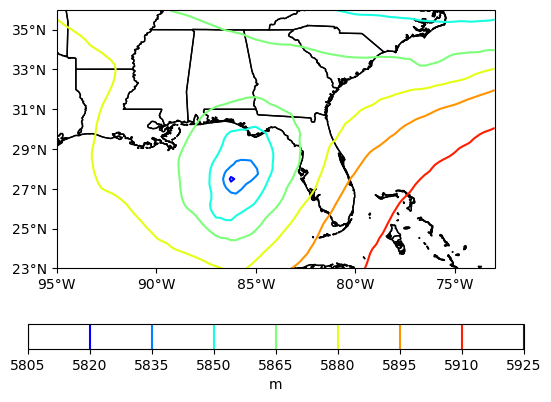

In [17]:
fig = plt.figure()

ax=plt.axes(projection=ccrs.PlateCarree())

cs=ax.contour(ds.z500['longitude'],ds.z500['latitude'], hermine2_days.z500[0,:,:],
            transform = ccrs.PlateCarree(),cmap='jet')
ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.coastlines()
        
ax.add_feature(feature.STATES)

cbar = plt.colorbar(cs, orientation='horizontal',label='m') 


Text(0.5, 0.98, 'z500 for tropical storm emily')

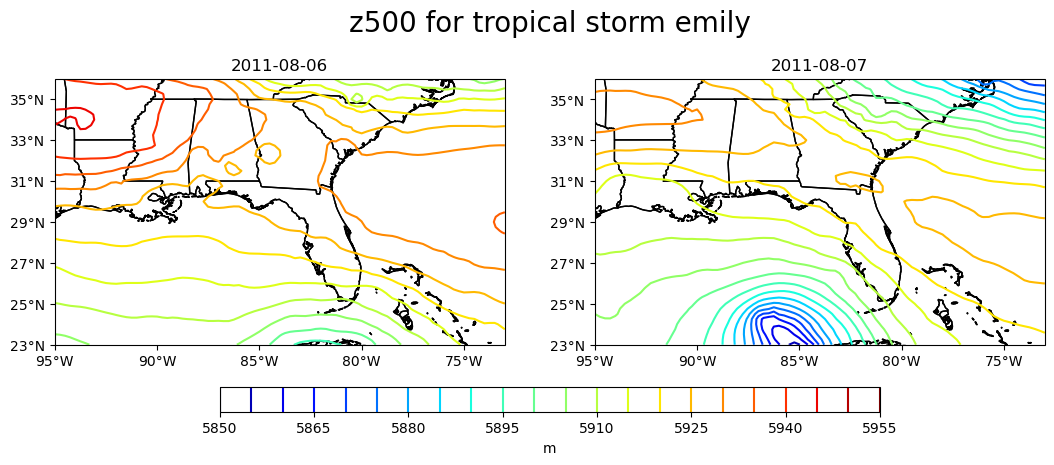

In [18]:
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
clevs = np.arange(5850,5960,5) 
# flatten it into 1-D array
axs=axs.flatten()

#Loop over all of days and plot
for i in range(0,2):

        # Select the days
        data=emily_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the day
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot and statelines
        axs[i].coastlines()
    
        axs[i].add_feature(feature.STATES)
        
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.05])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 for tropical storm emily',fontsize=20)

We can see some closed highs over Goergia and Alabama on the 1st day, and the beginnings of an intense closed low on day 2, as well as a band of closed highs, almost like a Rossby wave. In any case, these contours inidicates intense weather forming.

### Hurricane Irene

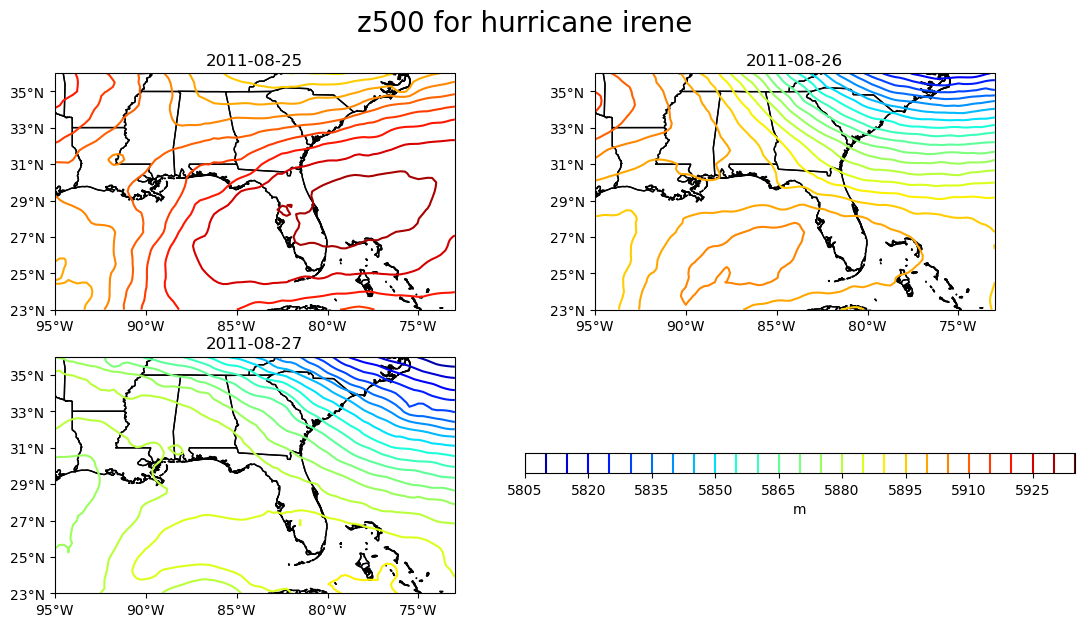

In [21]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(5805,5938,5) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=irene_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

cbar_ax = fig.add_axes([0.5, 0.4, 0.5, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 for hurricane irene',fontsize=20)
axs[3].set_axis_off()

We see some closed highs on the first day, but by day 2 we see low contours forming, and by day 3 are moving more southward.

## Tropical Storm Lee

Text(0.5, 0.98, 'z500 for tropical storm lee')

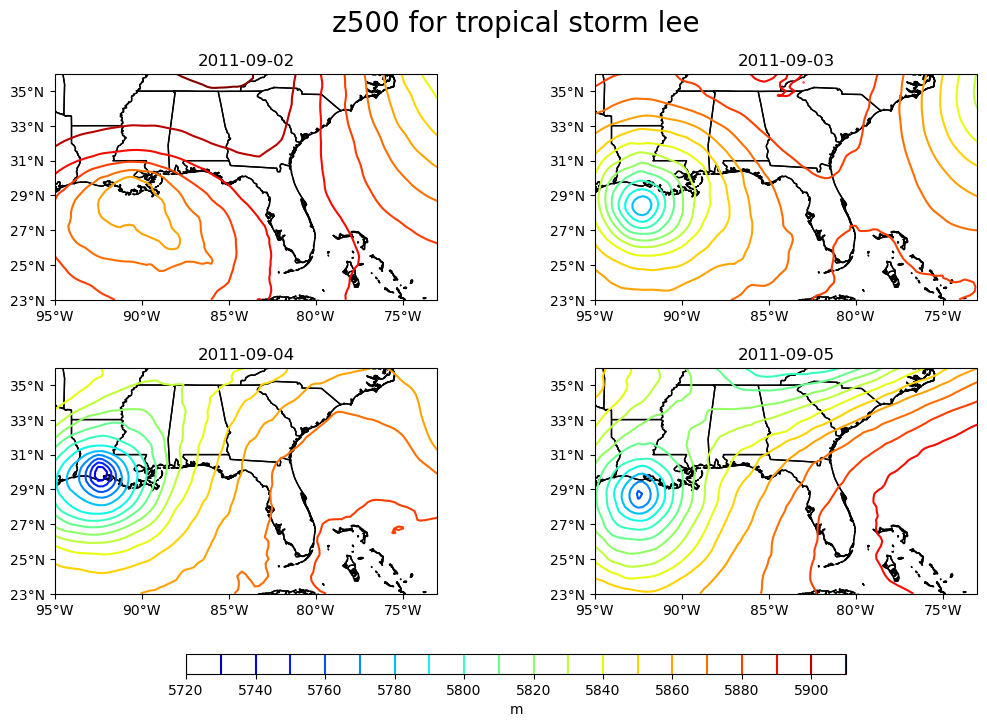

In [22]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(5720,5920,10) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,4):

        # Select the season
        data=lee_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 for tropical storm lee',fontsize=20)

We very clearly see intense closed lows on days 2-4, which indicates heavy precipitation and cooler temperatures, and potentially cyclonic activity.

# 2012 Plots

## Hurricane Isaac

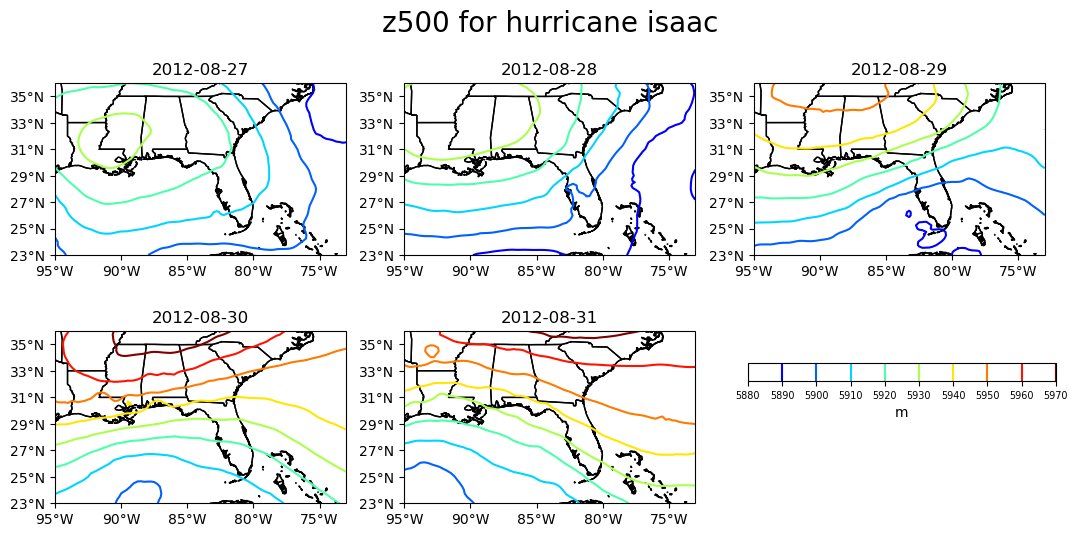

In [24]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,7))
clevs = np.arange(5880,5980,10) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,5):

        # Select the season
        data=isaac_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

cbar_ax = fig.add_axes([0.68, 0.45, 0.28, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')
cbar.ax.tick_params(labelsize=7)
# Add a big title at the top
plt.suptitle('z500 for hurricane isaac',fontsize=20)
axs[5].set_axis_off()

We see some closed contours, but they're all relatively high.

## Hurricane Sandy

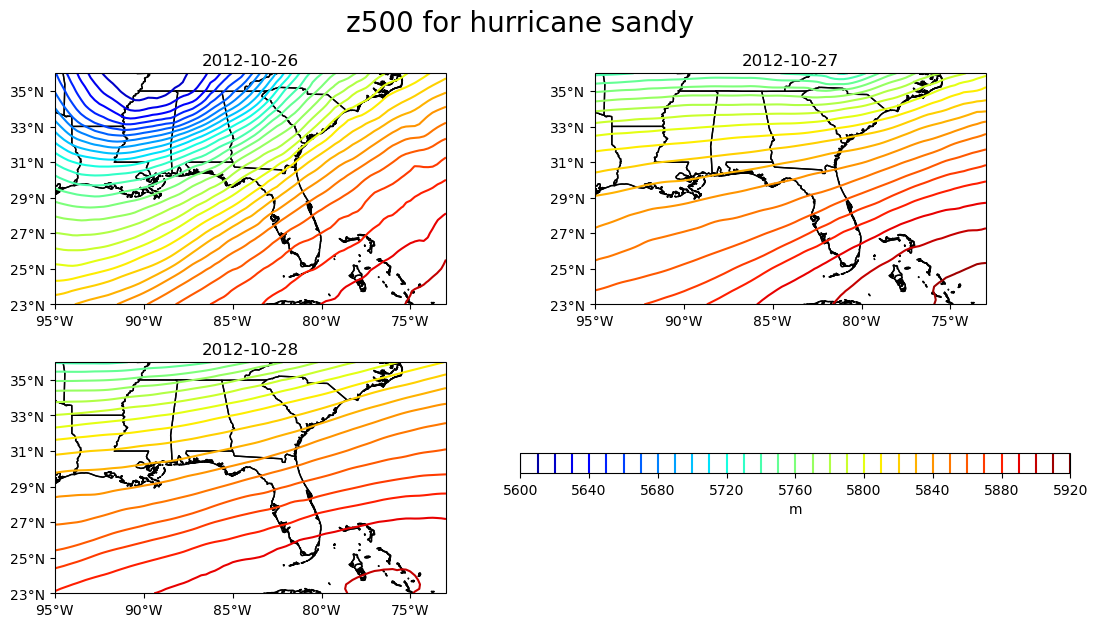

In [27]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(5600,5925,10) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=sandy_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25)

cbar_ax = fig.add_axes([0.5, 0.4, 0.5, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 for hurricane sandy',fontsize=20)
axs[3].set_axis_off()

These contours seem very diagonal, and we see a closed low pressure system on day 1 that seems to shift or dissipate by days 2 and 3, while the high contours seem to stay relatively stationary. 

# 2013 Plots

## Tropical Storm Karen

Text(0.5, 0.98, 'z500 for tropical storm karen')

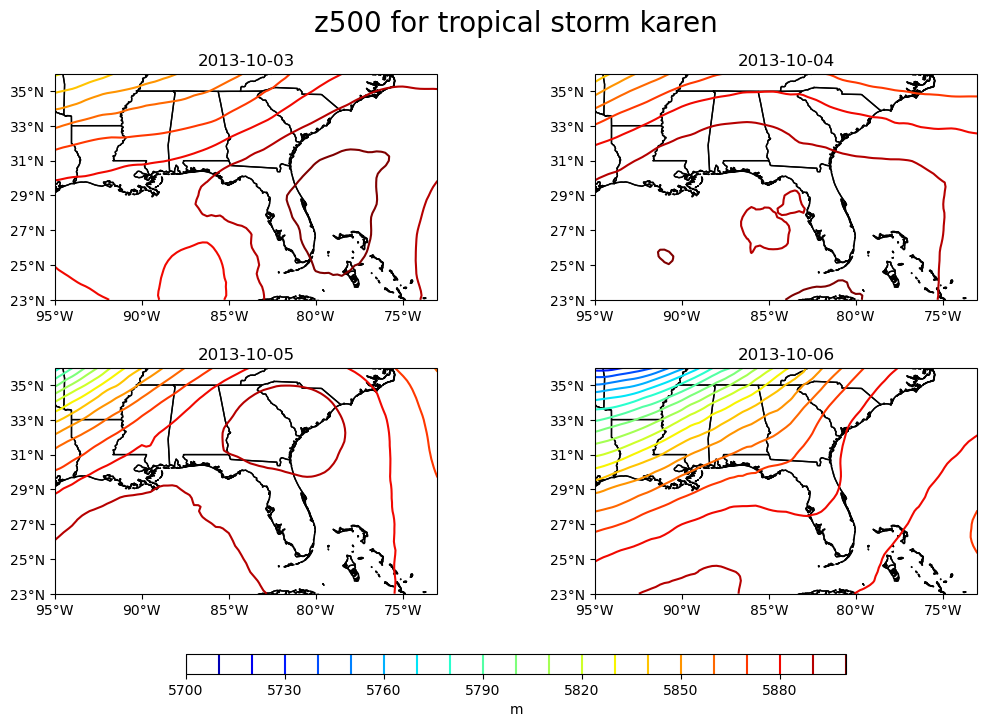

In [28]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(5700,5910,10) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,4):

        # Select the season
        data=karen_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 for tropical storm karen',fontsize=20)

These contours are also interesting is that they aren't very low, or at the top of the range, but still toward the higher side. We see many instances of closed contours on days 1-3, which to me seems like it could potentially indicate weather.

# 2014 Plots

## Tropical Storm Bertha

Text(0.5, 0.98, 'z500 for tropical storm bertha')

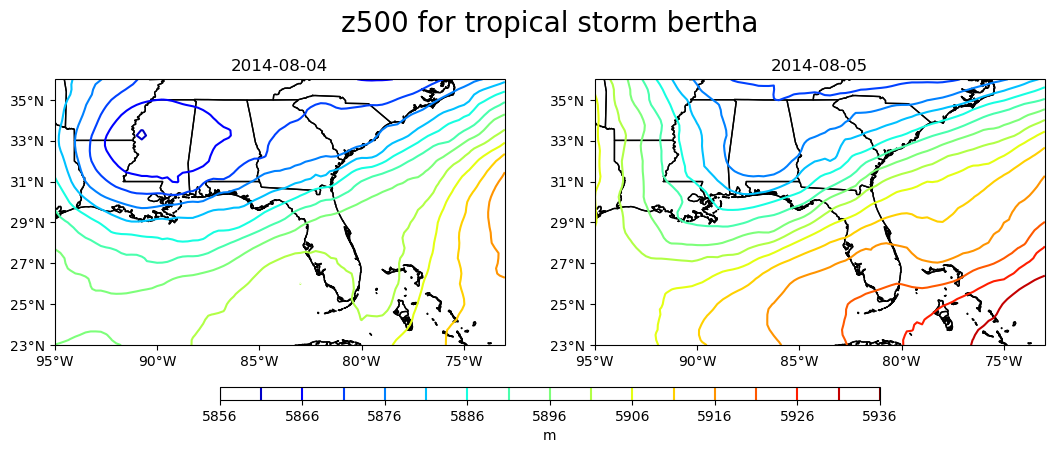

In [29]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
clevs = np.arange(5856,5940,5) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,2):

        # Select the season
        data=bertha_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        axs[i].set_title(data['time.date'].values)
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 for tropical storm bertha',fontsize=20)

these contours between days 1 and 2 aren't very far apart in terms of magnitude of height, so it's hard to draw any conclusions about what could be showing here.

# 2015 Plots

## Hurricane Joaquin

Text(0.5, 0.98, 'z500 for hurricane joaquin, october')

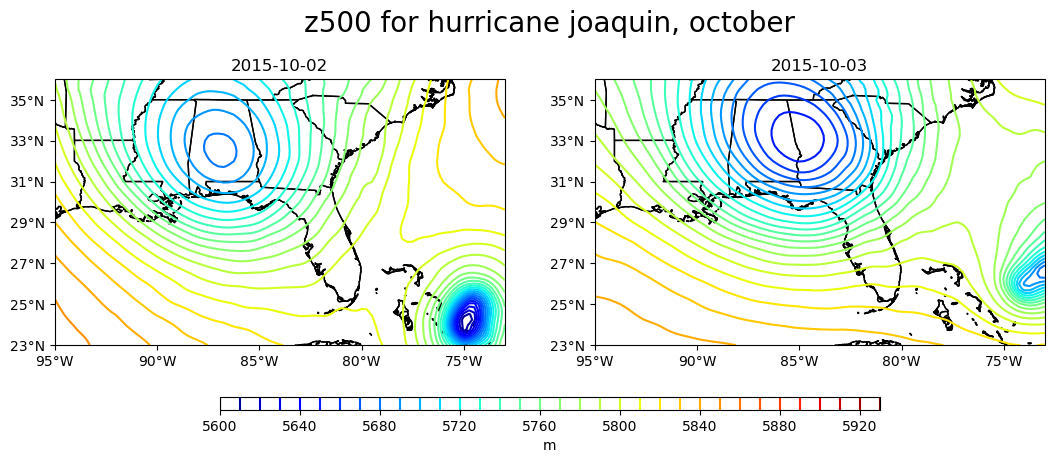

In [30]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
clevs = np.arange(5600,5940,10) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,2):

        # Select the season
        data=joaquin_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        axs[i].set_title(data['time.date'].values)
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.18, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 for hurricane joaquin, october',fontsize=20)

This one is my favorite because we see 2 very strong closed lows on both days. The one in the lower right corner seems to be a very intense closed low, perhaps a cyclonic system. 

# 2016 Plots

## Hurricane Hermine

Text(0.5, 0.98, 'z500 for hurricane hermine, august')

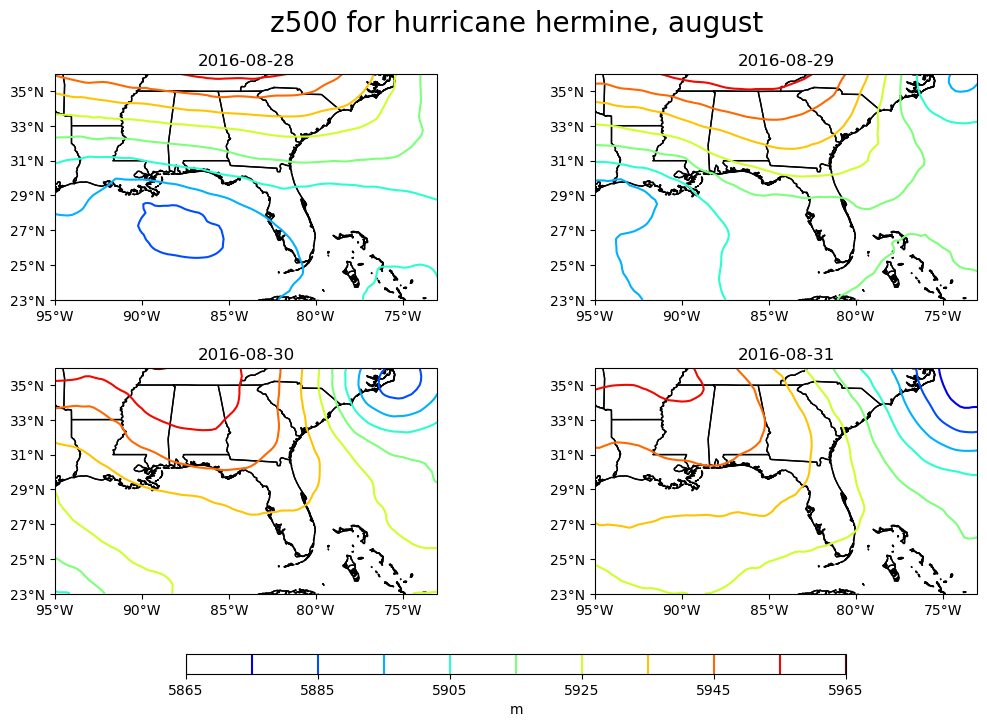

In [31]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(5865,5970,10) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,4):

        # Select the season
        data=hermine1_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        axs[i].set_title(data['time.date'].values)
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 for hurricane hermine, august',fontsize=20)

Again, these contours aren't very far apart in terms of magnitude, so it's difficult trying to interpret this. It's also at the end of the month, so it's a very far forecast, so it probably is not very accurate.

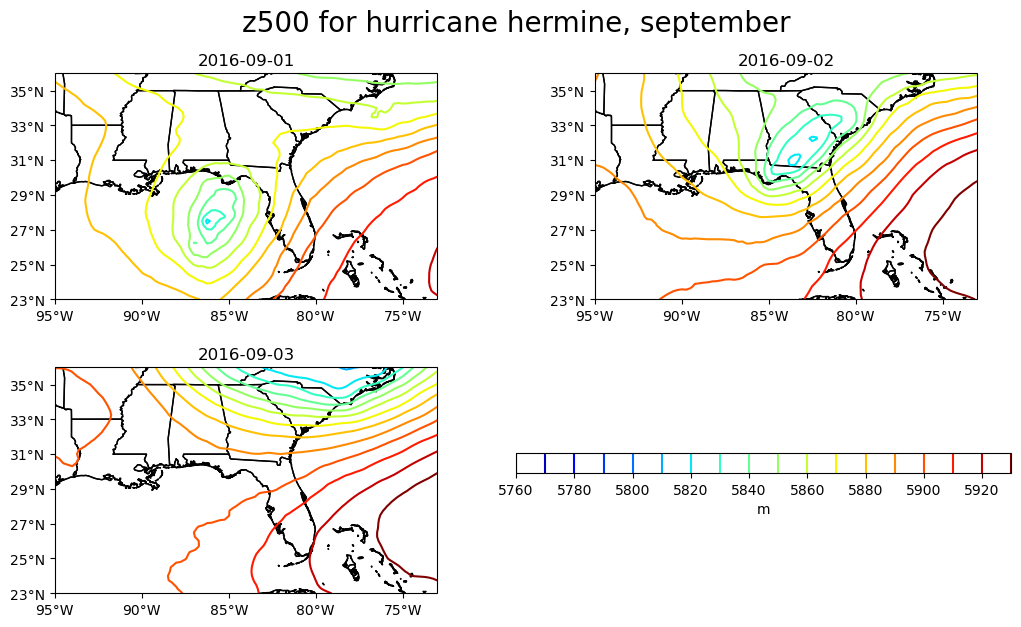

In [33]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(5760,5940,10) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=hermine2_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        axs[i].set_title(data['time.date'].values)
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.5, 0.4, 0.45, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 for hurricane hermine, september',fontsize=20)
axs[3].set_axis_off()

We see closed lows traveling in a relatively distinct path between contours of high pressure, which to me indicates some sort of vorticity-induced movement. 

## tropical storm julia

Text(0.5, 0.98, 'z500 for tropical storm julia')

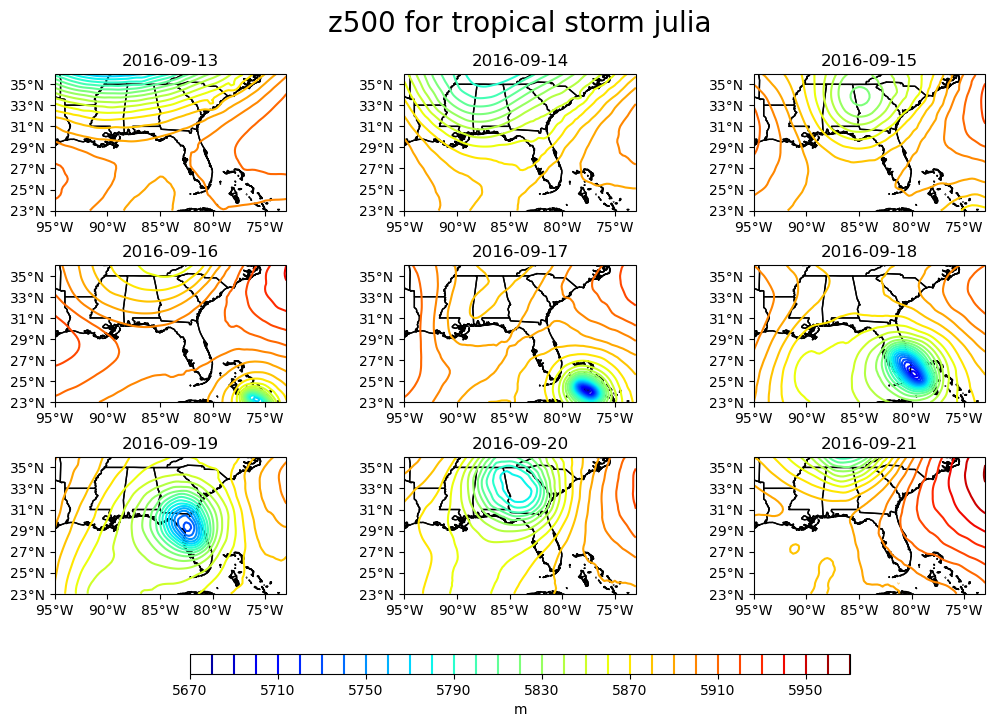

In [34]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(5670,5975,10) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,9):

        # Select the season
        data=julia_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        axs[i].set_title(data['time.date'].values)
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.4)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 for tropical storm julia',fontsize=20)

Similar to Joaquin, this one is very interesting because we see very strong closed lows, indicating some sort of vortex-like movement. And on such a large scale, such as covering the entire width of Florida, it could potentially be a tropical storm. However, with it being so far in the forecast, it's not entirely accurate.

## Hurricane Matthew

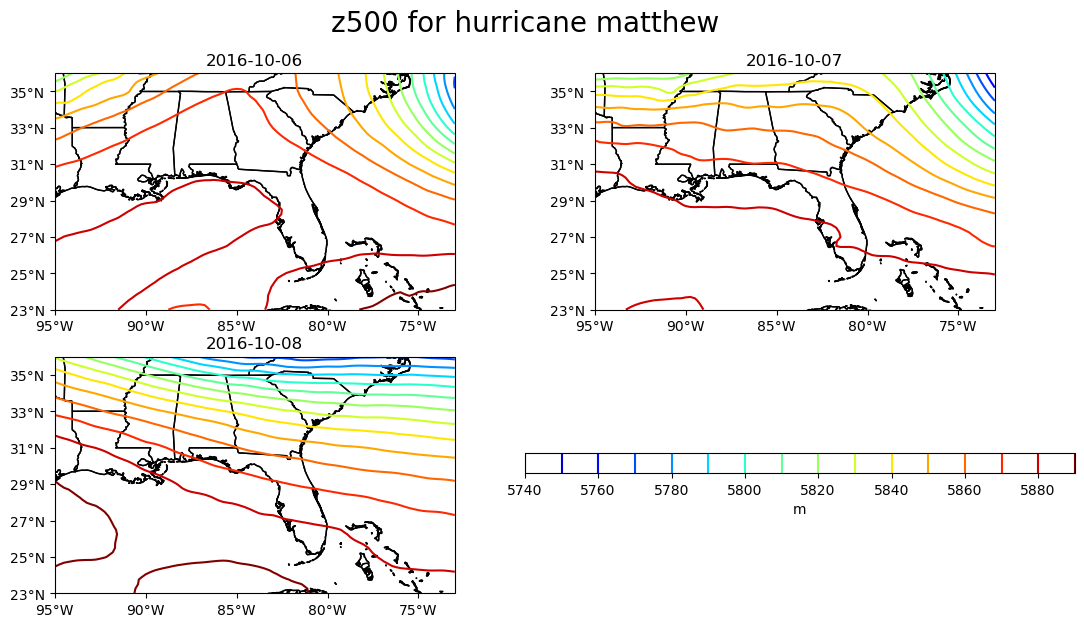

In [36]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(5740,5900,10) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=matthew_days.z500[i,:,:]

        # Contour plot
        cs=axs[i].contour(ds.z500['longitude'],ds.z500['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        axs[i].set_title(data['time.date'].values)
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

cbar_ax = fig.add_axes([0.5, 0.4, 0.5, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 for hurricane matthew',fontsize=20)

axs[3].set_axis_off()

This last one is pretty interesting as well, given what we know about Hurricane Matthew, I was expecting to see more behavior similar to tropical storm Julie, but we do see some cool behaviors regardless.

Another thing to note is that Matthew formed on September 28th, and dissipated on October 9th. On 2016-09-30 it was classified as a Cat 5. It still had hurricane force winds (cats 1 and 2) on the 3 days I have plotted, but we don't really see evidence of that on the contour map. 